Chapter 22

# 鸡或兔
Book_5《统计至简》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

该代码利用贝叶斯统计方法估计观测数据（兔子和鸡数量）的后验分布。具体而言，代码通过 `Dirichlet` 分布作为先验、`Multinomial` 分布作为似然，基于观察数据估计兔子和鸡在总体中的比例。

1. **设定先验分布**：代码设定 $ \text{Dirichlet}(\alpha) $ 分布作为先验，其中 $ \alpha = [2, 2] $ 表示对两个类别的均等先验，这相当于假设兔子和鸡的比例均匀且对称。

2. **似然函数**：定义多项式分布作为似然函数，用于描述观测到的兔子和鸡的数量 $ \text{data} = [2, 3] $，即在一次抽样中观察到兔子和鸡的频数。

3. **后验分布采样**：使用PyMC的MCMC采样方法（Metropolis-Hastings）进行参数估计，生成1000个后验样本，并使用两个链（chains）采样以确保收敛性。

4. **结果分析与可视化**：通过生成的后验分布样本，计算其摘要统计，包括均值、方差等。绘制采样轨迹图、后验直方图和后验核密度估计图，以展示后验分布的特征。

   对于每个参数 \( \theta_i \)（兔子或鸡的比例），后验分布函数为：
   $$
   p(\theta_i | \text{data}) \propto \text{Dirichlet}(\alpha) \cdot \text{Multinomial}(\text{data} | \theta)
   $$
   通过轨迹图、直方图和核密度估计图，可以观察参数收敛情况和后验分布的估计结果。

### Initializations

## 导入所需的库

In [2]:
import pandas as pd  # 导入数据处理库
import numpy as np  # 导入数值计算库
import matplotlib.pyplot as plt  # 导入绘图库
import pymc as pm  # 导入PyMC库，用于贝叶斯建模
# https://www.pymc.io/projects/docs/en/latest/installation.html
# conda create -c conda-forge -n pymc_env "pymc>=5"
# conda activate pymc_env
# https://snyk.io/advisor/python/pymc

## 设定先验分布参数

In [4]:
alphas = np.array([2, 2])  # Dirichlet分布参数, 相当于Beta(2, 2)

## 数据定义

In [6]:
data = np.array([2, 3])  # 观测数据（兔子和鸡的数量）
animals = ['Rabbit', 'Chicken']  # 动物种类标签

## 创建模型对象

In [8]:
with pm.Model() as model:
    prior = pm.Dirichlet('parameters', a=alphas, shape=2)  # 设置先验分布为Dirichlet分布
    observed_data = pm.Multinomial('observed_data', 
                                   n=data.sum(), 
                                   p=prior, 
                                   shape=2, 
                                   observed=data)  # 设置似然函数为多项式分布

## 模拟后验分布

In [10]:
with model:
    trace = pm.sample(draws=1000, chains=2, tune=200, discard_tuned_samples=True)  # 进行采样，获取后验分布

Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [parameters]


C:\Users\james\anaconda3\envs\pymc_env\Lib\site-packages\rich\live.py:231: UserWarning: install "ipywidgets" for 
Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 2 chains for 200 tune and 1_000 draw iterations (400 + 2_000 draws total) took 27 seconds.
We recommend running at least 4 chains for robust computation of convergence diagnostics


## 输出结果

In [12]:
summary = pm.summary(trace)  # 生成采样结果的摘要统计
summary.index = animals  # 设置摘要统计的行索引为动物种类
summary  # 显示摘要结果

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
Rabbit,0.456,0.152,0.153,0.711,0.006,0.004,718.0,881.0,1.0
Chicken,0.544,0.152,0.289,0.847,0.006,0.004,718.0,881.0,1.0


## 绘制采样轨迹图

Text(0.5, 0, 'Iteration')

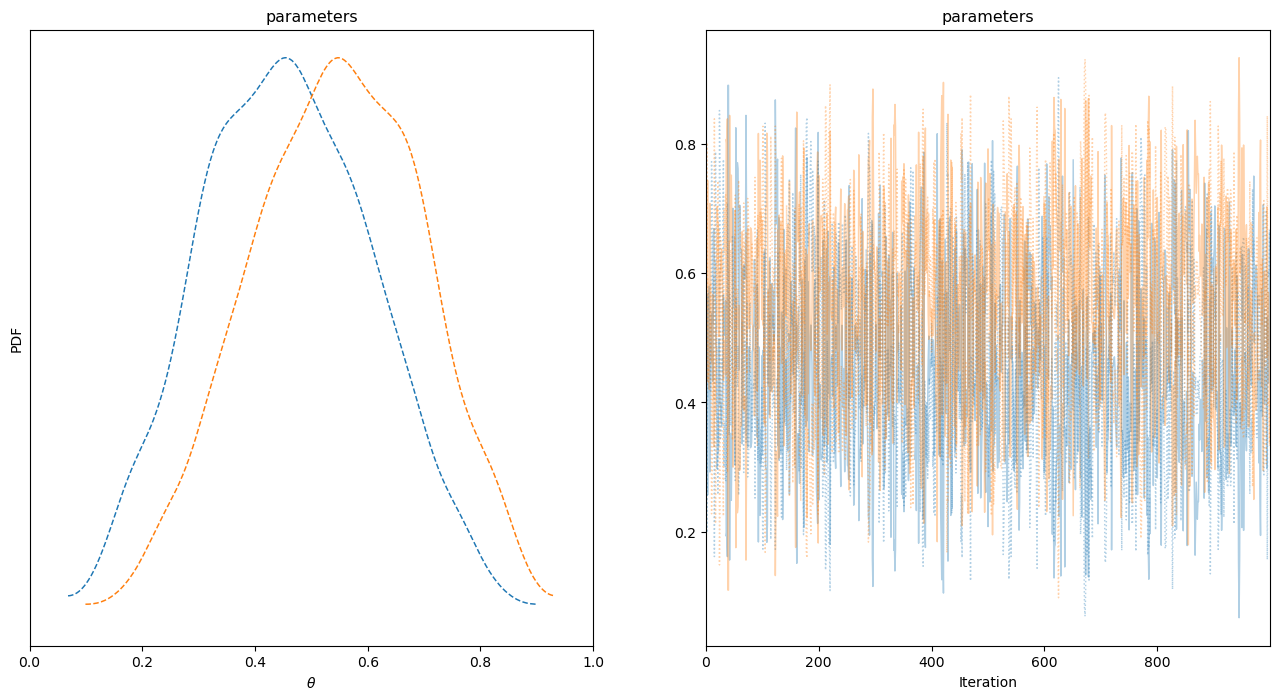

In [15]:
ax = pm.plot_trace(trace, figsize=(16, 8), combined=True)  # 绘制采样轨迹图，合并多个链
ax[0][0].set_xlabel(r'$\theta$')  # 设置x轴标签
ax[0][0].set_ylabel('PDF')  # 设置y轴标签
ax[0][0].set_xlim(0, 1)  # 设置x轴显示范围
ax[0][1].set_xlabel('Iteration')  # 设置迭代次数的x轴标签

# plt.savefig('Rabbit_Chicken_Posterior_Trace_plot_5.svg')  # 保存轨迹图

## 绘制后验直方图

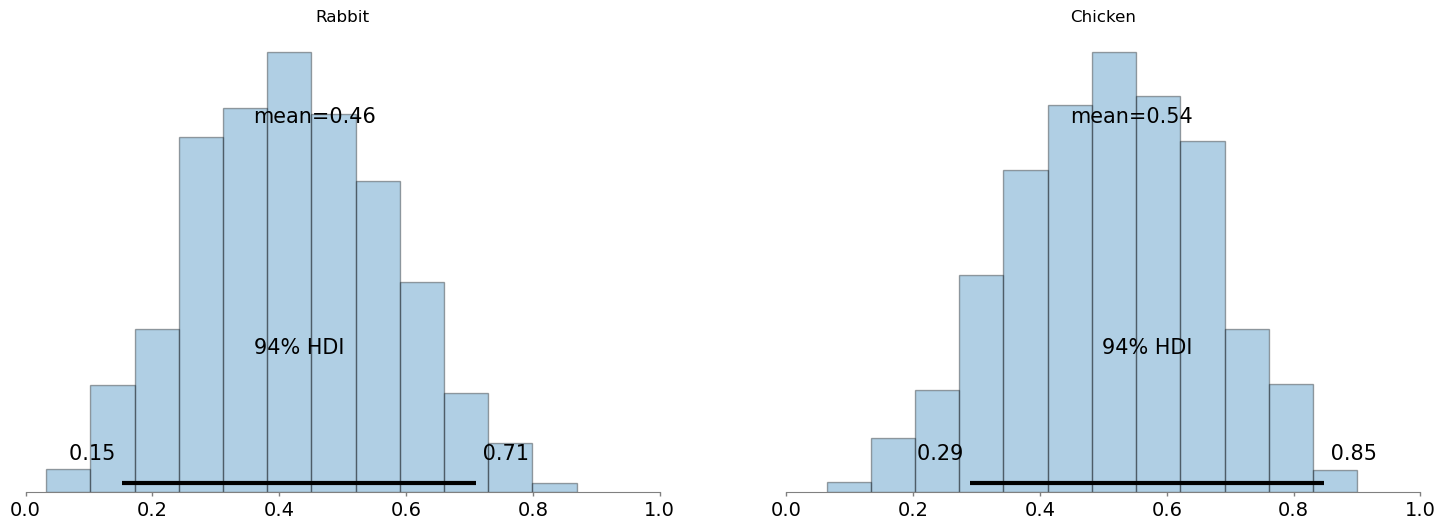

In [16]:
ax = pm.plot_posterior(trace, kind="hist", figsize=(18, 6), edgecolor='k')  # 绘制后验直方图
for i, a in enumerate(animals):
    ax[i].set_title(a)  # 设置每个图的标题为动物种类
    ax[i].set_xlim(0, 1)  # 设置x轴范围

# plt.savefig('Rabbit_Chicken_Posterior_Hist_5.svg')  # 保存后验直方图

## 绘制后验核密度估计图

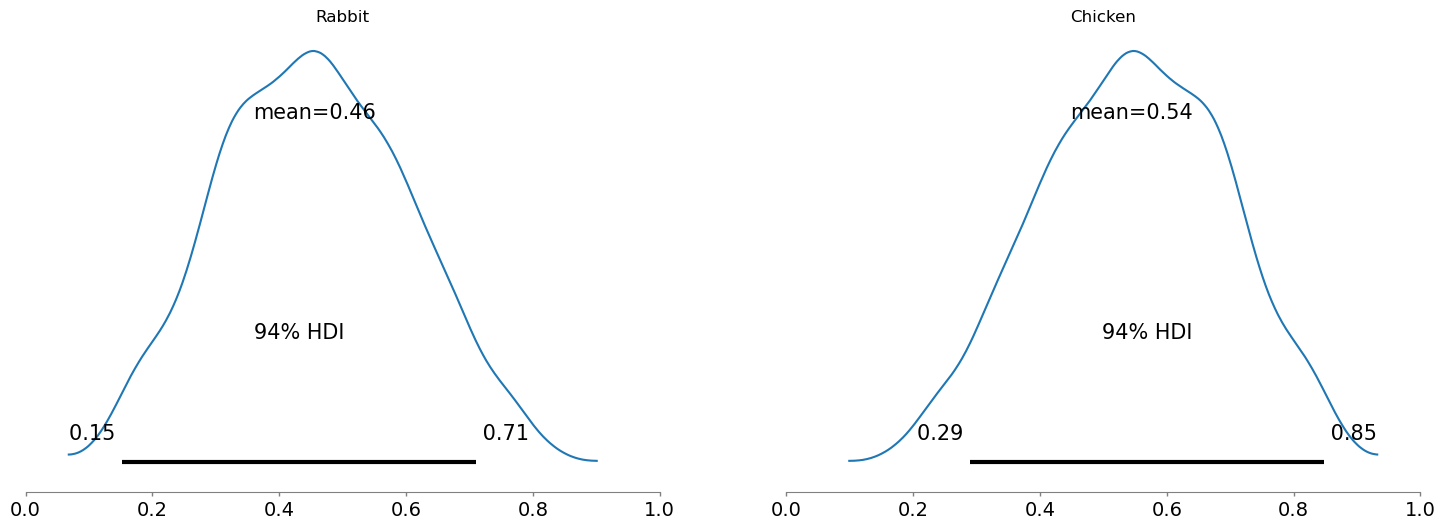

In [17]:
ax = pm.plot_posterior(trace, kind="kde", figsize=(18, 6))  # 绘制后验核密度估计图
for i, a in enumerate(animals):
    ax[i].set_title(a)  # 设置每个图的标题为动物种类
    ax[i].set_xlim(0, 1)  # 设置x轴范围

# plt.savefig('Rabbit_Chicken_Posterior_KDE_5.svg')  # 保存后验核密度估计图